In [1]:
from pathlib import Path
import os
%autoreload 2
import src.utils as utils
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
os.getcwd()

'/Users/bpedigo/JHU_code/maggot_models/maggot_models/notebooks'

### Choose experiment, print out configurations

In [11]:
experiment = "drosophila-3-rdpg-sbm"
run = 4
exp_path = Path(f"../models/runs/{experiment}/{run}")
run_path = exp_path / "run.json"
config_path = exp_path / "config.json"

config = utils.get_json(config_path)
print(f"Experiment: {experiment}")
print(f"Run: {run}")
print()
print("Experiment configuration:")
print()
for key, value in config.items():
    if not key == "__doc__":
        print(key)
        print(value)
        print()

dfs = utils.run_to_df(run_path)
sbm_df = dfs[0]
rdpg_df = dfs[1]
tsbm_df = dfs[2]

rdpg_df["RDPG"] = "RDPG"

Experiment: drosophila-3-rdpg-sbm
Run: 4

Experiment configuration:

directed
True

n_block_try_range
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

n_components_try_range
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_components_try_rdpg
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_sims_sbm
50

seed
27830144



### Plot the noise observed in SBM model fitting

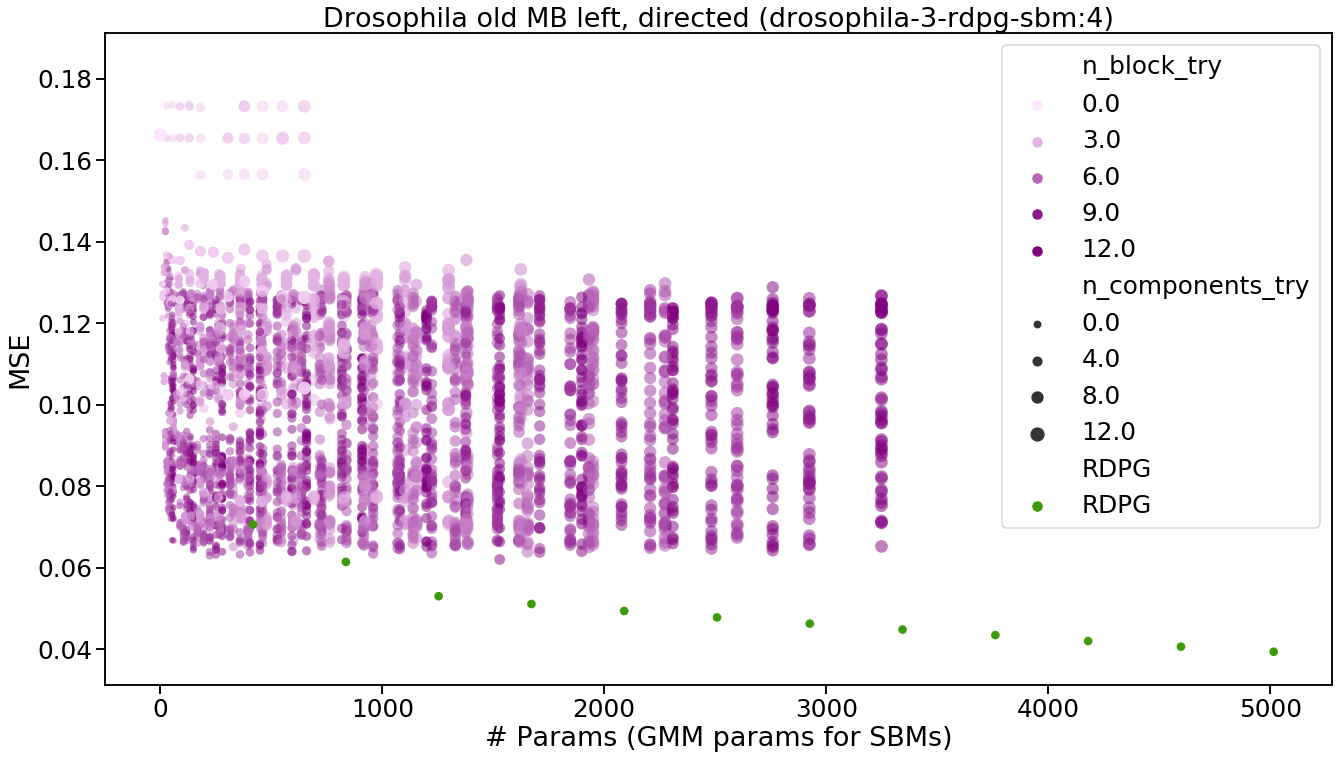

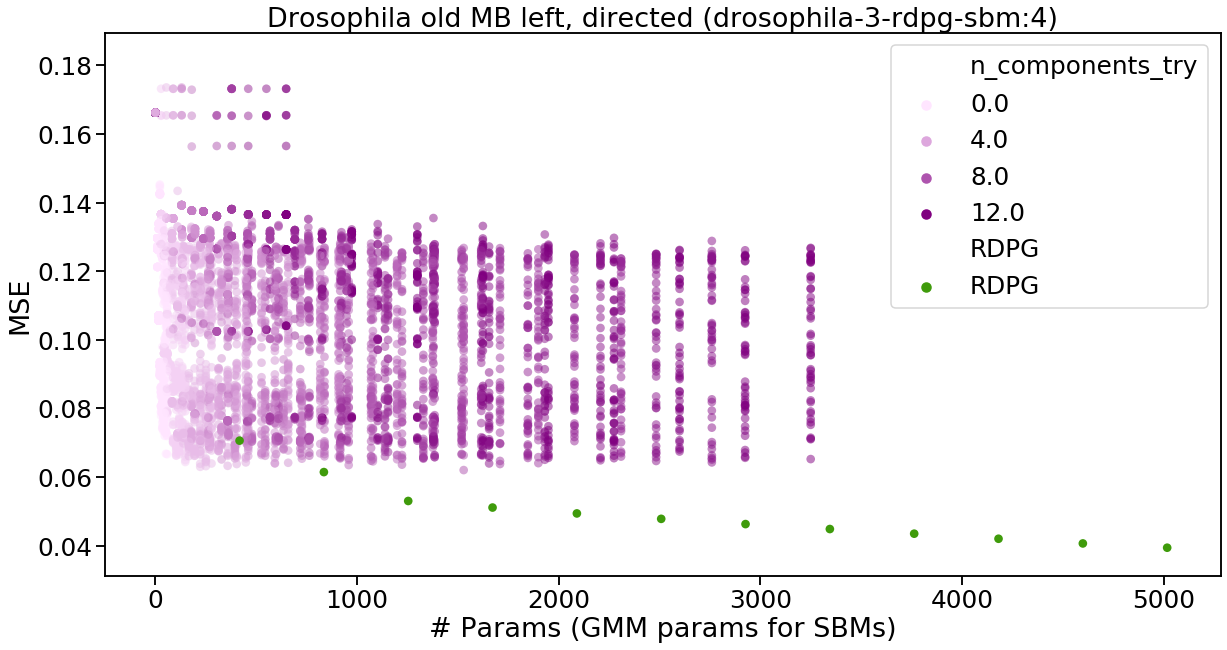

In [28]:
# Plotting setup
sns.set_context("talk", font_scale=1.5)
plt_kws = dict(s=75, linewidth=0, legend='brief')
sbm_cmap = sns.light_palette("purple", as_cmap=True)
rdpg_cmap = sns.xkcd_palette(["grass green"])

# Plot 1
plt.figure(figsize=(22,12))
sns.scatterplot(data=sbm_df,
                x="n_params_gmm",
                y="mse",
                hue="n_block_try",
                size="n_components_try",
                alpha=0.5,
                palette=sbm_cmap,
                **plt_kws)
sns.scatterplot(data=rdpg_df,
                x="n_params",
                y="mse",
                hue="RDPG",
                palette=rdpg_cmap,
                **plt_kws)
plt.xlabel("# Params (GMM params for SBMs)")
plt.ylabel("MSE")
plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");

# Plot 2 
plt.figure(figsize=(20,10))
sns.scatterplot(data=sbm_df,
                x="n_params_gmm",
                y="mse",
                hue="n_components_try",
                palette=sbm_cmap,
                alpha=0.5,
                **plt_kws,)
sns.scatterplot(data=rdpg_df,
                x="n_params",
                y="mse",
                hue="RDPG",
                palette=rdpg_cmap,
                **plt_kws)
plt.xlabel("# Params (GMM params for SBMs)")
plt.ylabel("MSE")
plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");

# # Plot 3
# plt.figure(figsize=(20,10))
# sns.scatterplot(data=sbm_df, x="n_params_sbm", y="mse", hue="n_components_try", **plt_kws, alpha=0.5)
# sns.scatterplot(data=rdpg_df, x="n_params", y="mse", **plt_kws)
# plt.xlabel("# Params (SBM params for SBMs)")
# plt.ylabel("MSE")
# plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");

### Get the best MSE SBM model fitting for each parameter set

In [23]:
param_df = sbm_df[sbm_df["sim_ind"]==0]
labels = ["n_block_try", "n_components_try", "mse"]
param_df = param_df.loc[:, labels]
param_df["best_sim"] = 0
param_df["best_ind"] = 0
for i in range(50):
    df = sbm_df[sbm_df["sim_ind"]==i]
    for j, row in df.iterrows():
        params = row[labels]
        p_df = param_df.loc[(param_df[labels[0]]==row[labels[0]])
                            & (param_df[labels[1]]==row[labels[1]])]
        ind = p_df.index
        if row["mse"] <= param_df.loc[ind, "mse"].values[0] :
            param_df.loc[ind, "mse"] = row["mse"]
            param_df.loc[ind, "best_sim"] = row["sim_ind"]
            param_df.loc[ind, "best_ind"] = j
best_sbm_df = sbm_df.loc[param_df["best_ind"].values, :]

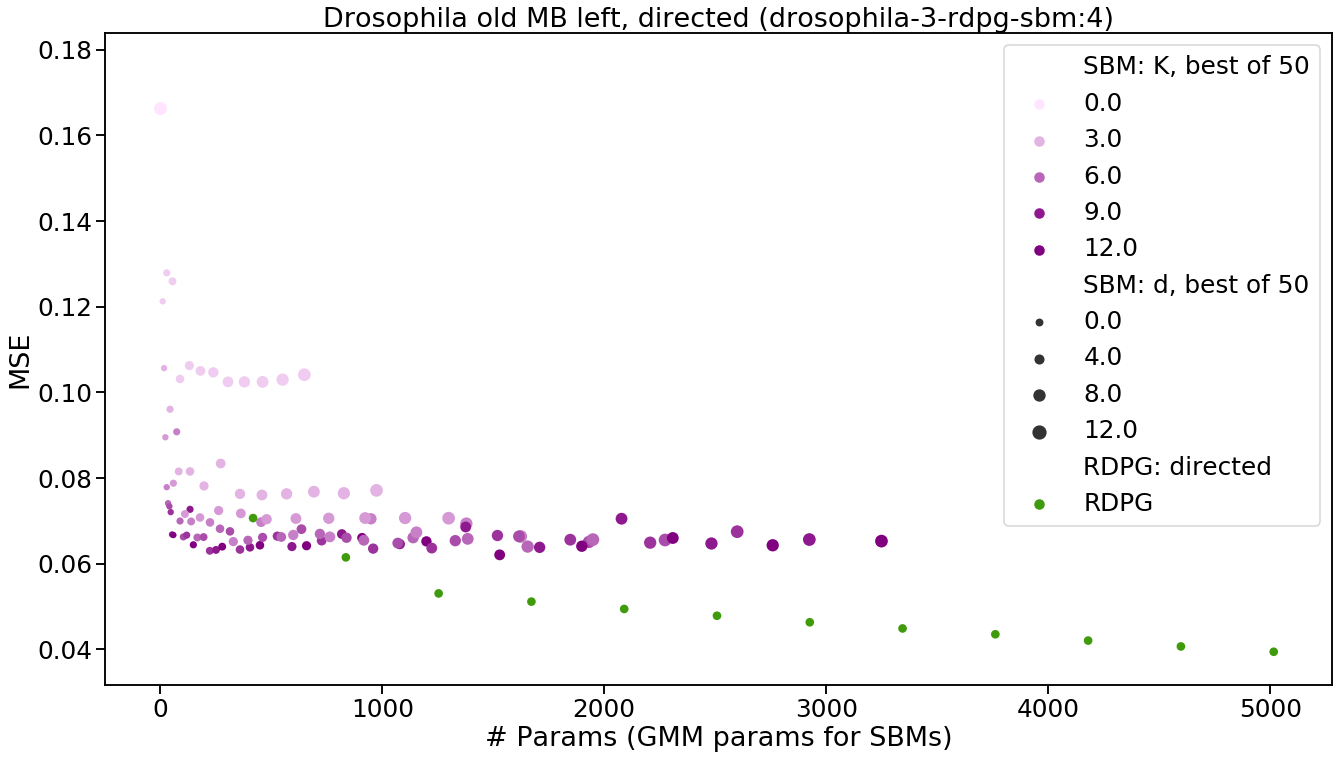

In [24]:
plt.figure(figsize=(22,12))
cmap = sns.light_palette("purple", as_cmap=True)

sns.scatterplot(data=best_sbm_df,
                x="n_params_gmm",
                y="mse",
                hue="n_block_try",
                size="n_components_try",
                palette=cmap,
                **plt_kws,)

cmap = sns.xkcd_palette(["grass green"])
s = sns.scatterplot(data=rdpg_df,
                x="n_params",
                y="mse",
                hue="RDPG",
                palette=cmap,
                **plt_kws)

leg = s.axes.get_legend()
leg.get_texts()[0].set_text("SBM: K, best of 50")
leg.get_texts()[6].set_text("SBM: d, best of 50")
leg.get_texts()[11].set_text("RDPG: directed")
plt.xlabel("# Params (GMM params for SBMs)")
plt.ylabel("MSE")
plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");



In [26]:
tsbm_df

,mse,n_block_try,n_components_try,n_params_gmm,n_params_sbm,rss,score
0,0.166239,1.0,1.0,1.0,1.0,3613.379594,-11221.955282
1,0.106412,2.0,1.0,9.0,3.0,2312.969776,-6766.947073
10,0.166239,1.0,2.0,1.0,1.0,3613.379594,-11221.955282
100,0.166239,1.0,11.0,1.0,1.0,3613.379594,-11221.955282
101,0.124673,2.0,11.0,89.0,3.0,2709.902167,-8369.221153
102,0.164258,3.0,11.0,71.0,6.0,3570.306633,-14290.618564
103,0.136074,4.0,11.0,179.0,10.0,2957.700503,-10718.151765
104,0.101170,5.0,11.0,224.0,15.0,2199.032809,-7784.207806
105,0.084700,6.0,11.0,269.0,21.0,1841.028508,-5834.775248
106,0.091844,7.0,11.0,314.0,28.0,1996.310559,-8589.453785


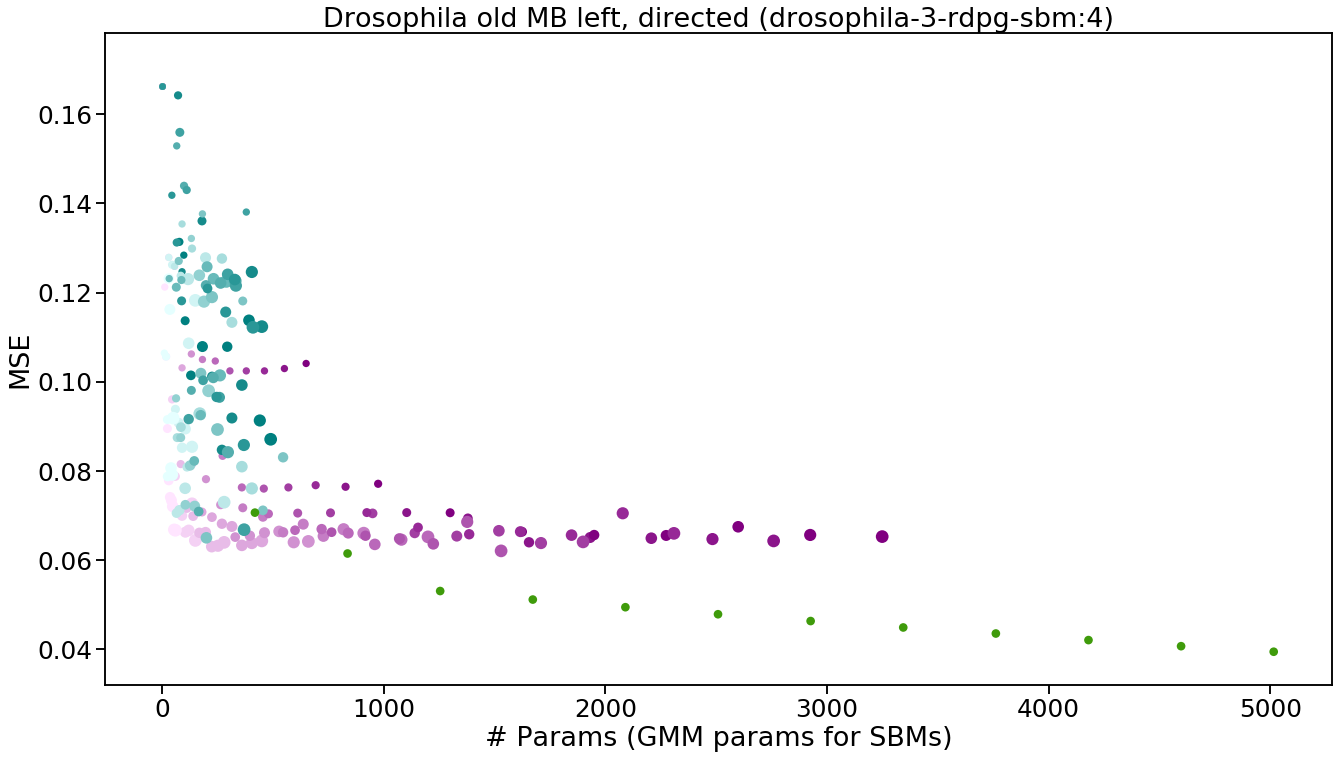

In [30]:
plt.figure(figsize=(22,12))
plt_kws = dict(s=75, linewidth=0, legend=False)

cmap = sns.light_palette("purple", as_cmap=True)
sns.scatterplot(data=best_sbm_df,
                x="n_params_gmm",
                y="mse",
                hue="n_components_try",
                size="n_block_try",
                palette=cmap,
                **plt_kws,)

cmap = sns.light_palette("teal", as_cmap=True)
s = sns.scatterplot(data=tsbm_df,
                x="n_params_gmm",
                y="mse",
                hue="n_components_try",
                size="n_block_try",
                palette=cmap,
                **plt_kws)

cmap = sns.xkcd_palette(["grass green"])
s = sns.scatterplot(data=rdpg_df,
                x="n_params",
                y="mse",
                hue="RDPG",
                palette=cmap,
                **plt_kws)

# leg = s.axes.get_legend()
# leg.get_texts()[0].set_text("SBM: d, best of 50")
# leg.get_texts()[5].set_text("SBM: K, best of 50")
# leg.get_texts()[11].set_text("RDPG: directed")
plt.xlabel("# Params (GMM params for SBMs)")
plt.ylabel("MSE")
plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");

In [8]:
# param_df = sbm_df[sbm_df["sim_ind"]==0]
# labels = ["n_block_try", "mse"]
# param_df = param_df.loc[:, labels]
# param_df["best_sim"] = 0
# param_df["best_ind"] = 0
# for i in range(2):
#     df = sbm_df[sbm_df["sim_ind"]==i]
#     for j, row in df.iterrows():
#         params = row[labels]
#         p_df = param_df.loc[param_df[labels[0]]==row[labels[0]]]
#         ind = p_df.index
#         if row["mse"] <= param_df.loc[ind, "mse"].values[0]:
#             param_df.loc[ind, "mse"] = row["mse"]
#             param_df.loc[ind, "best_sim"] = row["sim_ind"]
#             param_df.loc[ind, "best_ind"] = j
# best_sbm_df = sbm_df.loc[param_df["best_ind"].values, :]

In [9]:
# plt.figure(figsize=(20,10))
# sns.scatterplot(data=best_sbm_df, x="n_params_gmm", y="mse", hue="n_block_try", **plt_kws, alpha=0.5)
# sns.scatterplot(data=rdpg_df, x="n_params", y="mse", **plt_kws)
# plt.xlabel("# Params (GMM params for SBMs)")
# plt.ylabel("MSE")
# plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");

# plt.figure(figsize=(20,10))
# sns.scatterplot(data=best_sbm_df, x="n_params_gmm", y="mse", hue="n_components_try", **plt_kws, alpha=0.5)
# sns.scatterplot(data=rdpg_df, x="n_params", y="mse", **plt_kws)
# plt.xlabel("# Params (GMM params for SBMs)")
# plt.ylabel("MSE")
# plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");



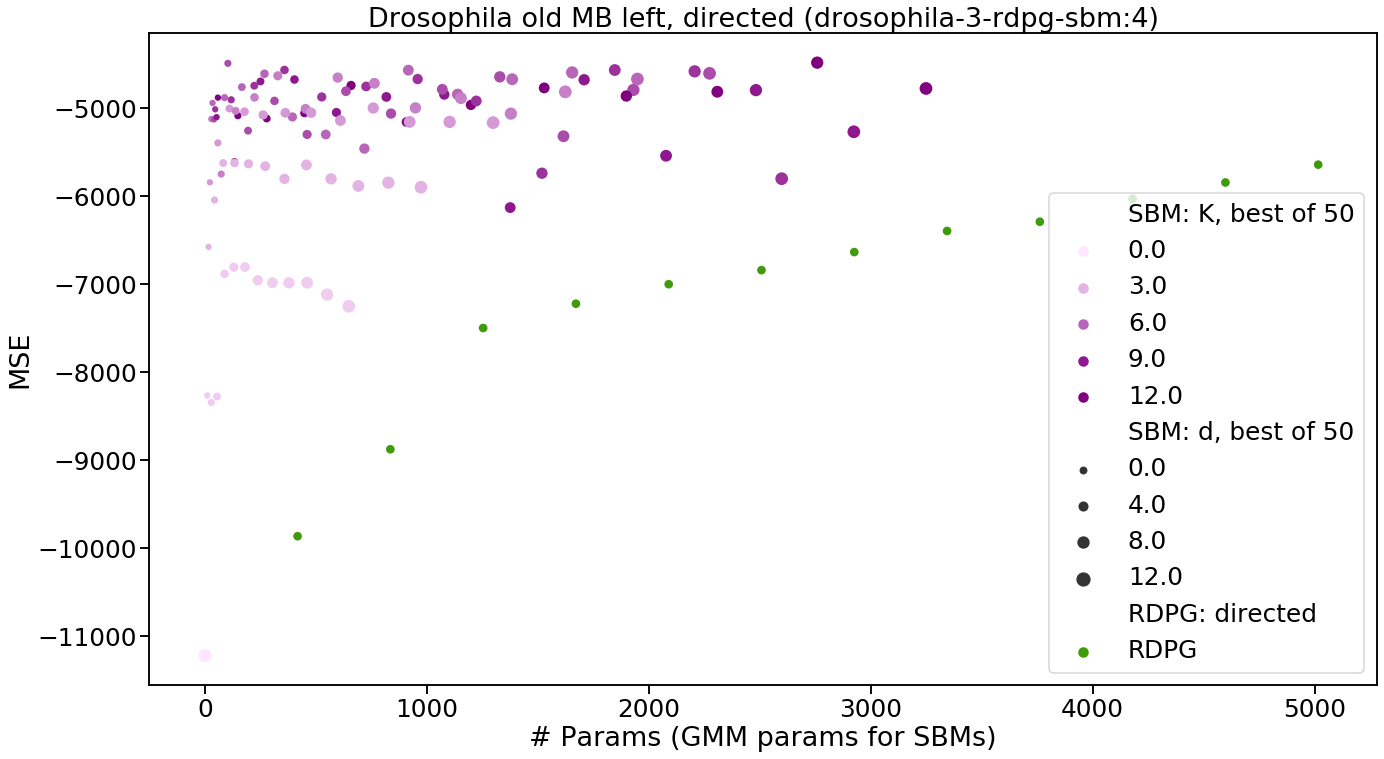

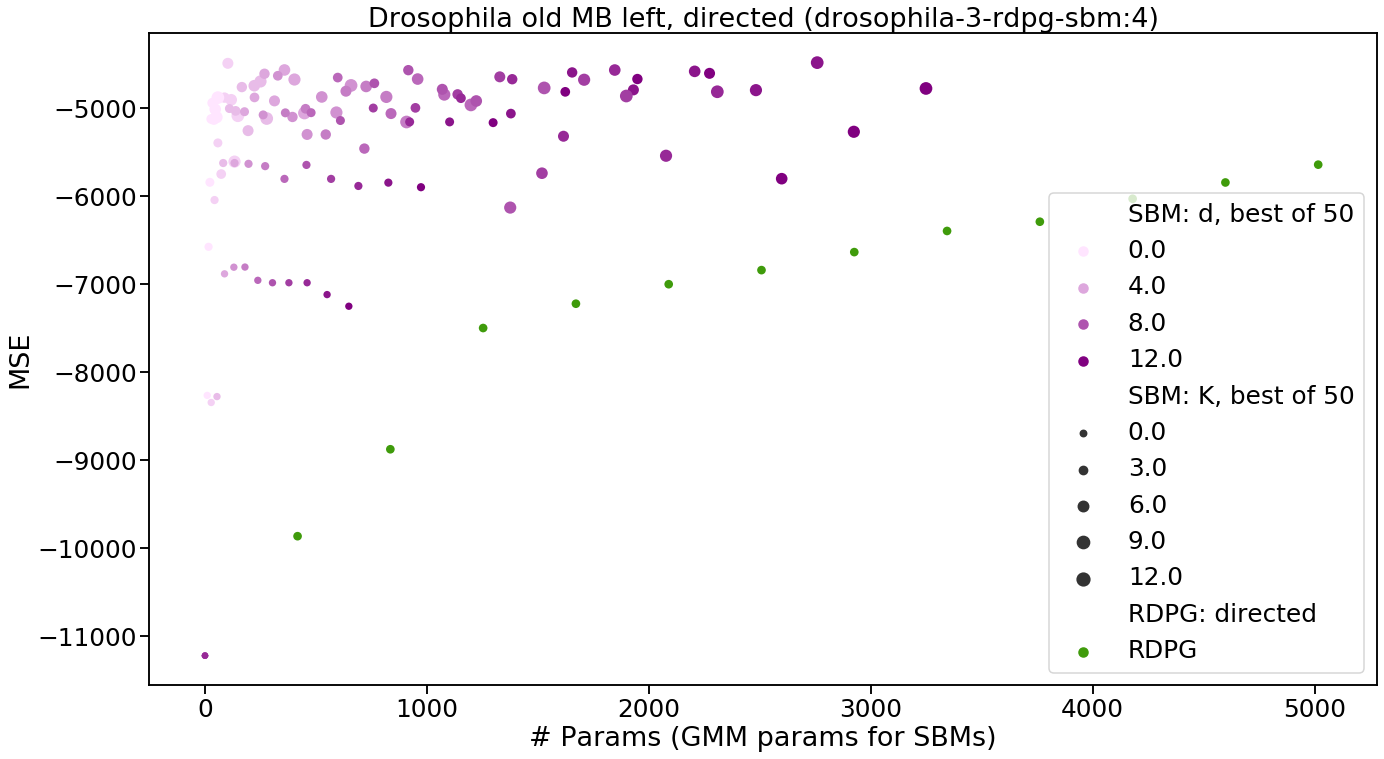

In [10]:
plt.figure(figsize=(22,12))

cmap = sns.light_palette("purple", as_cmap=True)
sns.scatterplot(data=best_sbm_df,
                x="n_params_gmm",
                y="score",
                hue="n_block_try",
                size="n_components_try",
                palette=cmap,
                **plt_kws,)

cmap = sns.xkcd_palette(["grass green"])
s = sns.scatterplot(data=rdpg_df,
                x="n_params",
                y="score",
                hue="RDPG",
                palette=cmap,
                **plt_kws)

leg = s.axes.get_legend()
leg.get_texts()[0].set_text("SBM: K, best of 50")
leg.get_texts()[6].set_text("SBM: d, best of 50")
leg.get_texts()[11].set_text("RDPG: directed")
plt.xlabel("# Params (GMM params for SBMs)")
plt.ylabel("MSE")
plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");

#####

plt.figure(figsize=(22,12))

cmap = sns.light_palette("purple", as_cmap=True)
sns.scatterplot(data=best_sbm_df,
                x="n_params_gmm",
                y="score",
                hue="n_components_try",
                size="n_block_try",
                palette=cmap,
                **plt_kws,)

cmap = sns.xkcd_palette(["grass green"])
s = sns.scatterplot(data=rdpg_df,
                x="n_params",
                y="score",
                hue="RDPG",
                palette=cmap,
                **plt_kws)

leg = s.axes.get_legend()
leg.get_texts()[0].set_text("SBM: d, best of 50")
leg.get_texts()[5].set_text("SBM: K, best of 50")
leg.get_texts()[11].set_text("RDPG: directed")
plt.xlabel("# Params (GMM params for SBMs)")
plt.ylabel("MSE")
plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");
